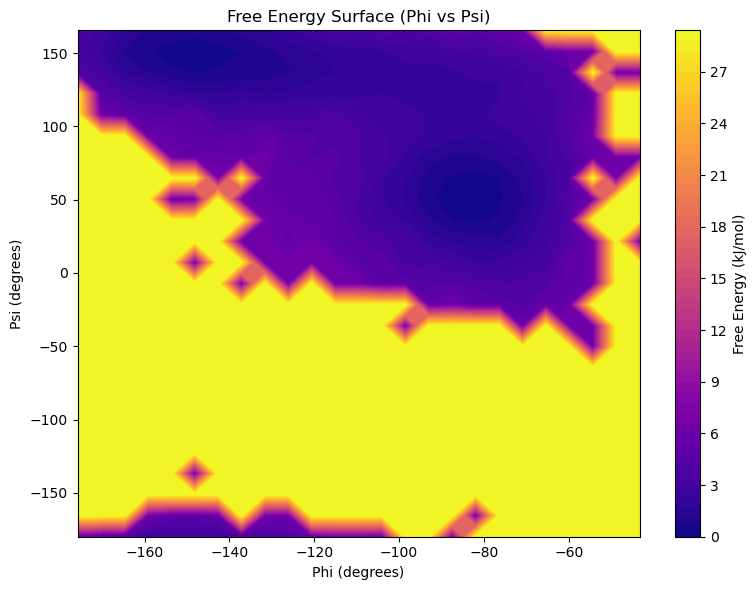

In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory and topology files
traj = md.load('../Data/md_15ns.xtc', top='../Data/md_15ns.gro')  # Use the .gro file as the topology

# Compute the phi and psi dihedral angles
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Convert radians to degrees
phi_angles_deg = np.rad2deg(phi_angles)
psi_angles_deg = np.rad2deg(psi_angles)

# Create a 2D histogram for phi and psi angles (25 bins for each direction)
hist, xedges, yedges = np.histogram2d(phi_angles_deg.flatten(), psi_angles_deg.flatten(), bins=25)

# Compute the free energy surface F(phi, psi) = -log(histogram)
fes = -np.log(hist.T + 1e-10)  # Add a small value to avoid log(0)

# Plot the free energy surface
plt.figure(figsize=(8, 6))
plt.contourf(xedges[:-1], yedges[:-1], fes - np.min(fes), levels=50, cmap='plasma')
plt.colorbar(label='Free Energy (kJ/mol)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Free Energy Surface (Phi vs Psi)')
plt.tight_layout()

# Save the plot
plt.savefig('../Figures/fes_phi_psi.png')  # Save the plot in your Figures folder
plt.show()
